# Predict House Prices Model

> ### Problem Statement

<p style="text-align: justify;">Tujuan utamanya adalah untuk memprediksi nilai rata-rata rumah di berbagai distrik di California dengan menggunakan data sensus tahun 1990. Dataset ini berisi beberapa fitur, termasuk lokasi geografis, karakteristik perumahan, demografi populasi, dan indikator ekonomi. Dengan mengembangkan model prediktif, kami bertujuan untuk memahami faktor-faktor utama yang memengaruhi harga rumah dan memberikan wawasan yang berharga bagi para pemangku kepentingan seperti investor real estat, perencana kota, pembuat kebijakan, dan calon pembeli rumah. </p>

> Goal 

<p style="text-align: justify;">
<ul>
    <li>Memprediksi Harga Rumah: Mengembangkan model regresi untuk memprediksi nilai rata-rata rumah (median_house_value) berdasarkan fitur-fitur seperti garis bujur, garis lintang, usia rata-rata rumah, jumlah kamar, jumlah kamar tidur, jumlah penduduk, jumlah rumah tangga, pendapatan rata-rata, dan kedekatan dengan laut.</li>
    <li>Mengidentifikasi Faktor Kunci: Menganalisis pentingnya berbagai fitur untuk menentukan pendorong utama harga rumah di California.</li>
    <li>Mendukung Pengambilan Keputusan: Memberikan wawasan yang dapat ditindaklanjuti bagi investor real estat, perencana kota, dan pembuat kebijakan untuk membuat keputusan yang tepat terkait dengan pasar perumahan, pembangunan perkotaan, dan keterjangkauan perumahan.</li>
    <li>Memungkinkan perencanaan keuangan dan investasi properti, analisis pasar perumahan, dan membantu calon pembeli dan penjual rumah untuk membuat keputusan yang lebih terinformasi.</li>


</ul>
</p>


> # EDA

In [123]:
# untuk manipulasi data
import pandas as pd
import numpy as np

# untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# untuk menghitung Variance Inflation Factor (VIF) dalam regresi linear
from statsmodels.stats.outliers_influence import variance_inflation_factor

# untuk normalisasi dan transformasi data
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler

# untuk pembagian dataset dan validasi model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# untuk membangun pipeline pemrosesan data dan model
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# untuk model Decision Tree dan visualisasi pohon keputusan
from sklearn.tree import DecisionTreeRegressor, plot_tree

# untuk model regresi linear dan regresi logistik (termasuk Lasso dan Ridge)
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# untuk model Knn
from sklearn.neighbors import KNeighborsRegressor

# untuk model Random Forest
from sklearn.ensemble import RandomForestRegressor

# untuk model XGBoost
from xgboost import XGBRegressor

# untuk evaluasi model regresi
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# untuk mengabaikan peringatan yang tidak diinginkan
import warnings
warnings.filterwarnings('ignore')


In [124]:
df_california = pd.read_csv('dataset/data_california_house.csv')
df_california.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


> ## EDA

In [125]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [126]:
df_california.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

> Summary Statistic Descriptive

In [127]:
display(df_california.describe().T,
        df_california.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
longitude,14448.0,-119.566647,2.006587,-124.3500,-121.8000,-118.4900,-118.0000,-114.3100
latitude,14448.0,35.630093,2.140121,32.5400,33.9300,34.2600,37.7100,41.9500
housing_median_age,14448.0,28.618702,12.596694,1.0000,18.0000,29.0000,37.0000,52.0000
total_rooms,14448.0,2640.132683,2191.612441,2.0000,1451.0000,2125.0000,3148.0000,32627.0000
total_bedrooms,14311.0,538.260709,423.577544,1.0000,295.0000,435.0000,647.0000,6445.0000
population,14448.0,1425.157323,1149.580157,3.0000,784.0000,1165.0000,1724.0000,35682.0000
households,14448.0,499.508929,383.098390,1.0000,279.0000,410.0000,604.0000,6082.0000
median_income,14448.0,3.866667,1.891158,0.4999,2.5706,3.5391,4.7361,15.0001
median_house_value,14448.0,206824.624516,115365.476182,14999.0000,119600.0000,180000.0000,263900.0000,500001.0000


,count,unique,top,freq
ocean_proximity,14448,5,<1H OCEAN,6369


> EDA 1 Histogram Numeric Column

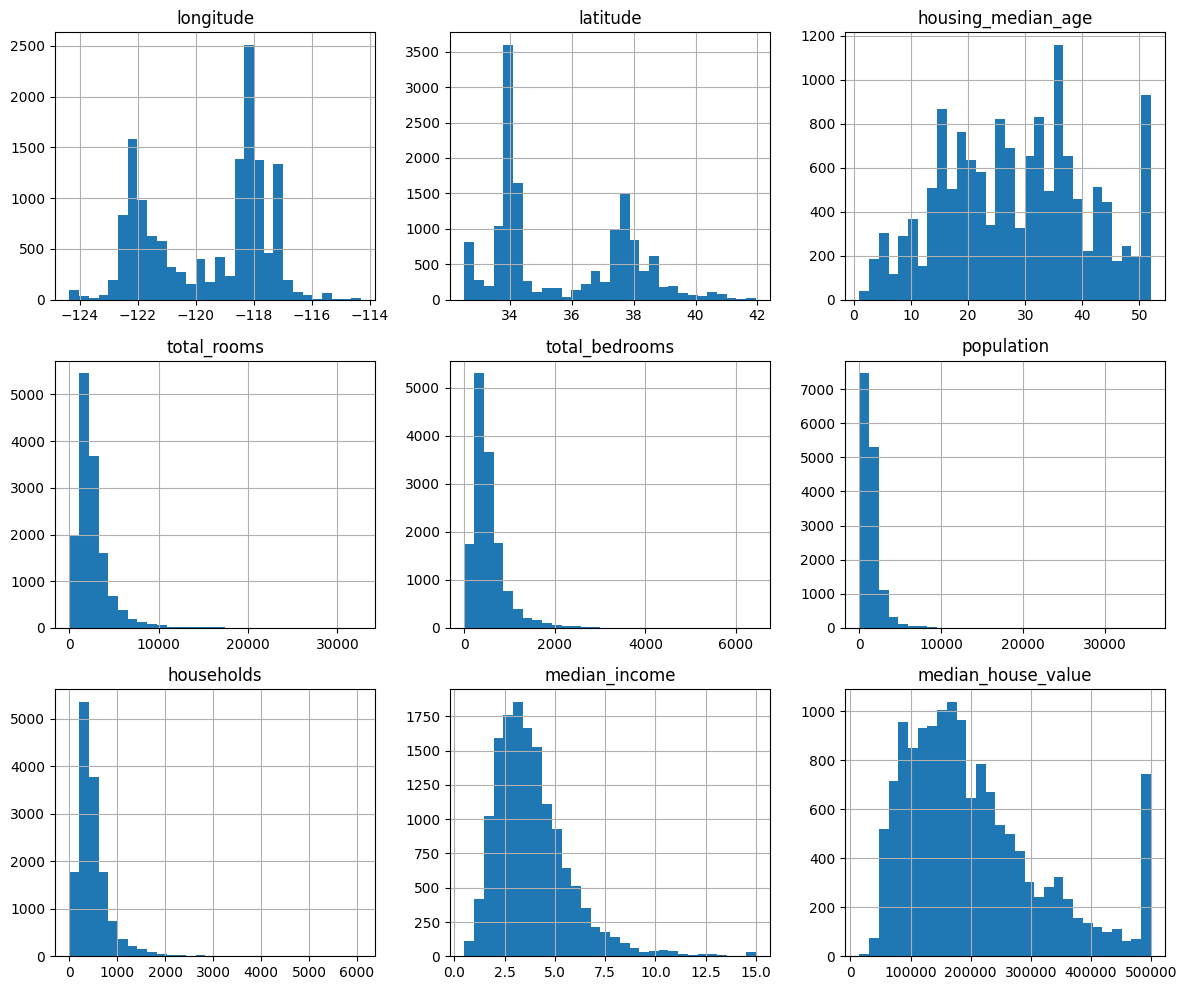

In [128]:
# Histogram from variable Numerik
df_california.hist(bins=30, figsize=(12,10))
plt.tight_layout()
plt.show()

<p style="text-align: justify;"> 
Pada histogram plot kita dapat mengecualikan grafik longitude dan latitude akan dijadikan kategorikal namun tipe data harus dipertahankan agar dapat menjadi titik koordinat, persebaran data yang terlihat aneh / tidak terdistribusi normal dapat dilihat pada grafik median_house_value(ada lebih dari 600 properti dengan harga $500.001(max value kolom median_house_value) serta pada housing_median_age dimana ada lebih dari 800 properti yang berusia 52 tahun(max value kolom housing_median_age))</p>

> Corelation Metric

In [129]:
corelation = df_california.drop('ocean_proximity', axis=1).corr(method='spearman')
corelation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.879491,-0.159119,0.053617,0.075678,0.135127,0.070564,-0.006842,-0.069389
latitude,-0.879491,1.000000,0.041108,-0.033410,-0.069869,-0.136729,-0.087238,-0.091646,-0.167250
housing_median_age,-0.159119,0.041108,1.000000,-0.363420,-0.314208,-0.288264,-0.289847,-0.148067,0.072069
total_rooms,0.053617,-0.033410,-0.363420,1.000000,0.916249,0.815582,0.907105,0.271127,0.199245
total_bedrooms,0.075678,-0.069869,-0.314208,0.916249,1.000000,0.870014,0.975877,-0.002529,0.081704
population,0.135127,-0.136729,-0.288264,0.815582,0.870014,1.000000,0.902576,0.005163,-0.001653
households,0.070564,-0.087238,-0.289847,0.907105,0.975877,0.902576,1.000000,0.032316,0.108217
median_income,-0.006842,-0.091646,-0.148067,0.271127,-0.002529,0.005163,0.032316,1.000000,0.680296
median_house_value,-0.069389,-0.167250,0.072069,0.199245,0.081704,-0.001653,0.108217,0.680296,1.000000


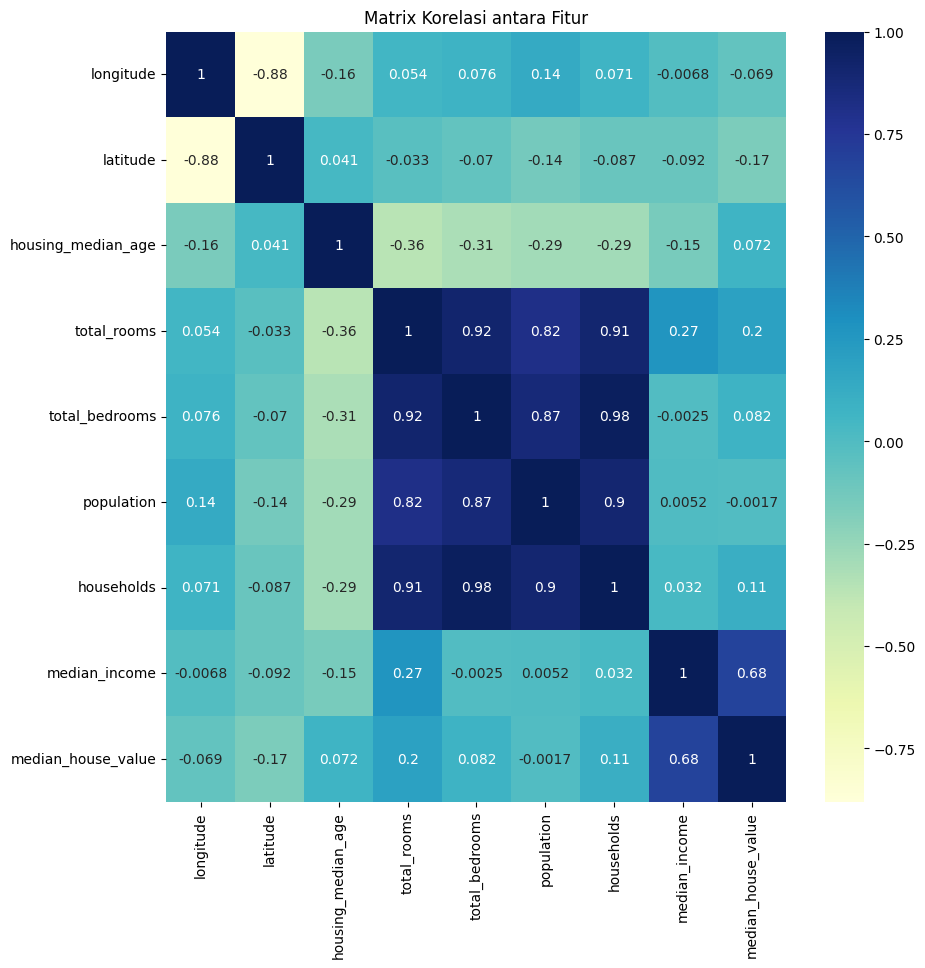

In [130]:
plt.figure(figsize=(10,10))
sns.heatmap(corelation,annot=True,cmap='YlGnBu').set_title('Matrix Korelasi antara Fitur')
plt.show()

<p style="text-align: justify;"> 
Pada "Korelasi heatmap" dapat dilihat bahwa korelasi dengan median_house_value yang tertinggi adalah pada median_income. </p>

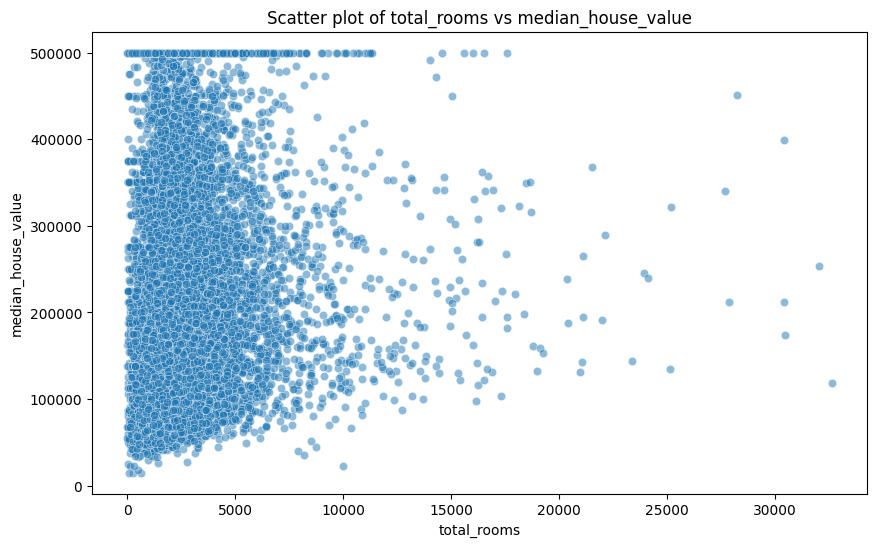

In [131]:
# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_rooms', y='median_house_value', data=df_california, alpha=0.5)
plt.title('Scatter plot of total_rooms vs median_house_value')
plt.show()

In [132]:
import matplotlib.image as mpimg

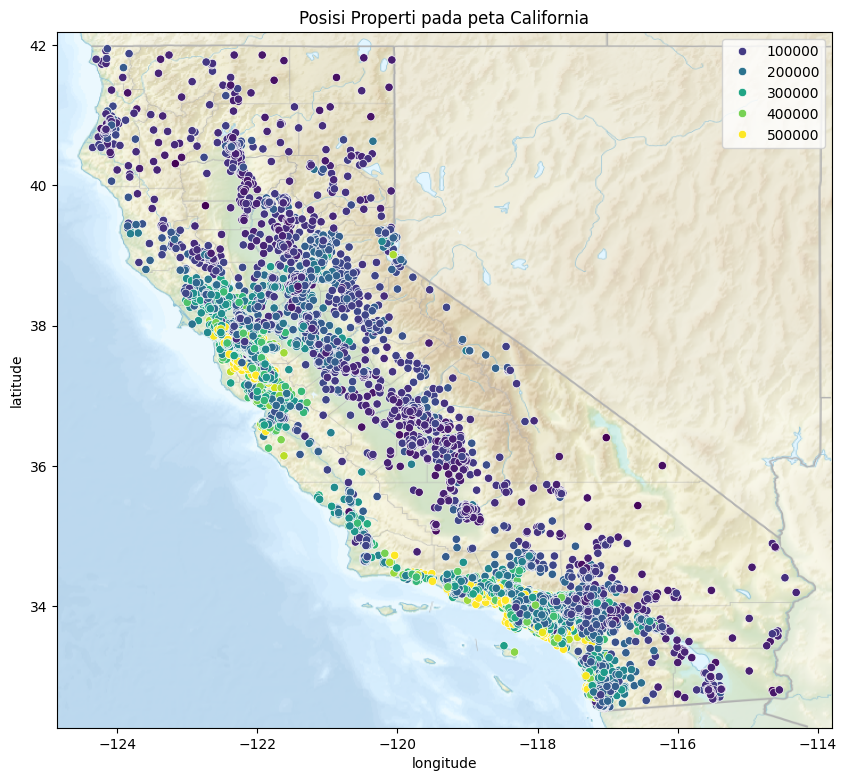

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_california, x="longitude", y="latitude", hue=df_california['median_house_value'],palette='viridis').set_title('Posisi Properti pada peta California')

# Asumsi bahwa 'dataset\california.png' adalah path yang benar ke gambar peta
california = mpimg.imread('dataset\california.png')
plt.imshow(california, extent=[-124.86, -113.8, 32.26, 42.19], alpha=0.5, cmap='jet')

# Menampilkan legenda
plt.legend()

plt.show()


<p style="text-align: justify;"> 
Dapat dilihat bahwa rumah yang ada di ISLAND dan semakin jauh dari pesisir pantai maka akan semakin murah </p>

> ## Data PreProcessing

<p style="text-align: justify;"> 
Setelah data kita breakdown pada EDA, mari kita pre-process data-data nya agar sesuai dengan kebutuhan analisis serta pembuatan model. 
<br>
1. Duplicates
<br>
2. Missing Value
<br>
3. Outliers
 </p>


### Duplicate Data

In [134]:
df_california.duplicated().sum()

0

### Missing Value

In [135]:
df_california.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [136]:
df_california['total_bedrooms'].fillna(df_california['total_bedrooms'].median(), inplace=True)

Outlier Data

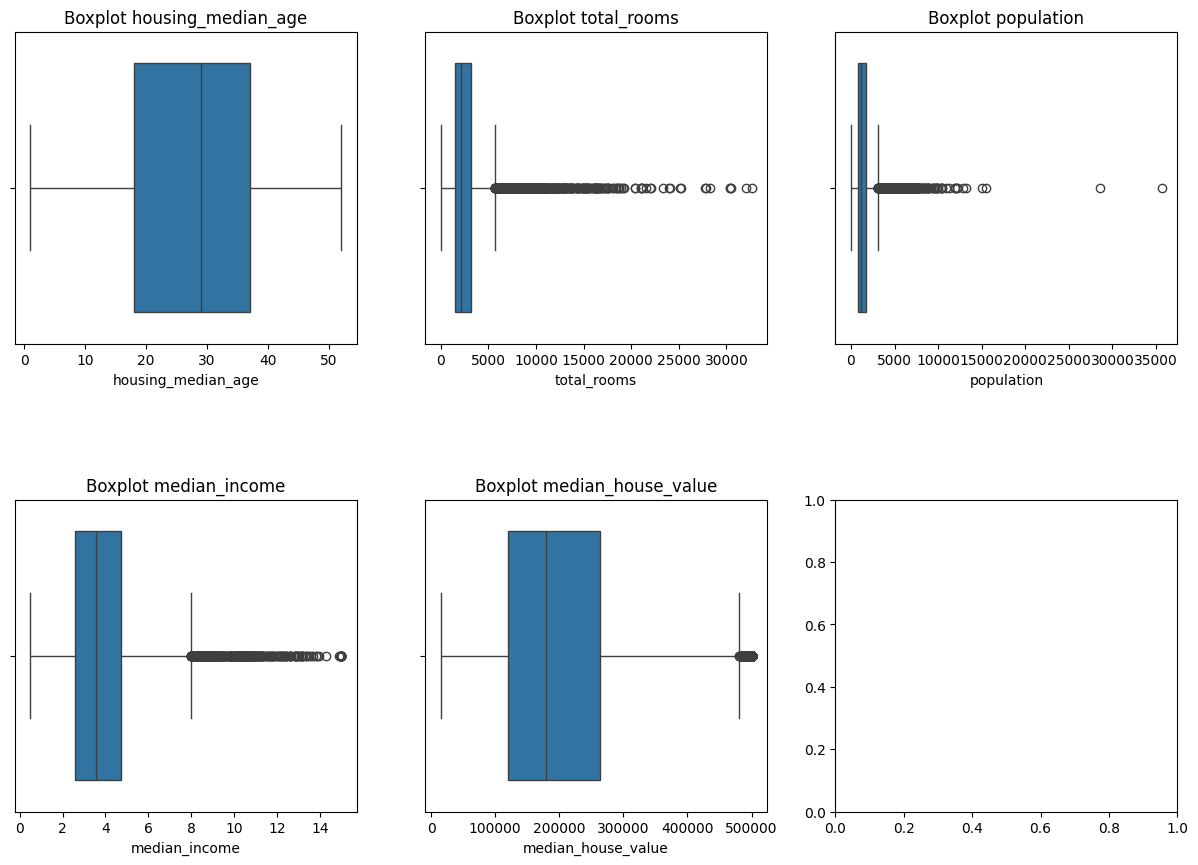

In [137]:
kolom = [ 'housing_median_age', 'total_rooms',
                    'population','median_income', 'median_house_value']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(bottom=0.1, hspace=0.5)

for i, col in enumerate(kolom):
    baris, kolom = divmod(i, 3)
    sns.boxplot(x=df_california[col], ax=axes[baris, kolom])
    axes[baris, kolom].set_title(f'Boxplot {col}')

Outlier yang ada merupakan bagian dari distribusi yang sebenarnya dan mencerminkan variabilitas alami dalam populasi, jika dihapus dapat menghilangkan informasi yang berharga.

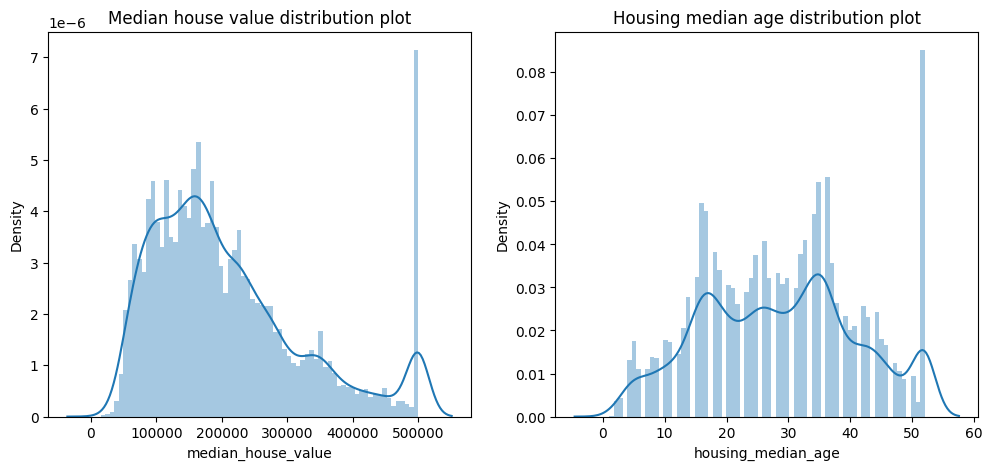

In [138]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df_california['median_house_value'],kde=True,bins=70).set_title('Median house value distribution plot')
plt.subplot(1,2,2)
sns.distplot(df_california['housing_median_age'],kde=True,bins=70).set_title('Housing median age distribution plot')
plt.show()

Remove Outlier

In [139]:
df_california = df_california.query('median_house_value != 500001.0 and housing_median_age != 52.0')

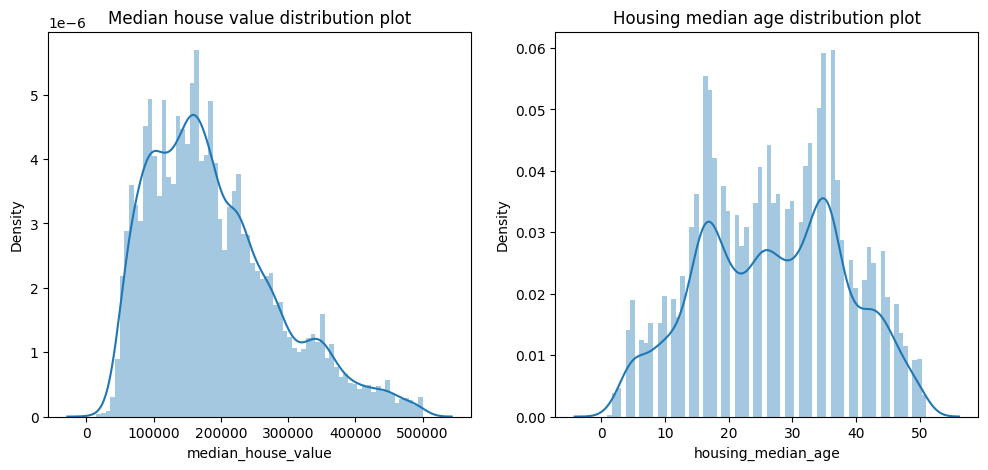

In [140]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df_california['median_house_value'],kde=True,bins=70).set_title('Median house value distribution plot')
plt.subplot(1,2,2)
sns.distplot(df_california['housing_median_age'],kde=True,bins=70).set_title('Housing median age distribution plot')
plt.show()

<p style="text-align: justify;">Dalam dataset Median_house_value, terdapat 678 data dengan nilai 500.001 yang tidak wajar. Ini kemungkinan merupakan kesalahan pencatatan atau pengumpulan data. Karena nilai tidak akurat,  diputuskan untuk menghapusnya.

Selain itu, pada kolom housing_median_age, ada 896 properti dengan umur 52 tahun. Meskipun ini mungkin benar, ada kecurigaan bahwa rumah yang lebih tua dari 51 tahun dikelompokkan ke dalam kategori ini. Untuk menghindari bias, kami juga menghapus data ini.

Kami juga memutuskan untuk mengubah data rumah berumur 51 tahun menjadi 50 tahun untuk keperluan machine learning agar model lebih sederhana dan konsisten.  </p>

> # Feature Enginering

add new feature 

In [141]:
df_california['rooms_per_household'] = df_california['total_rooms'] / df_california['households']
df_california['population_per_household'] = df_california['population'] / df_california['households']
df_california['bedrooms_per_room'] = df_california['total_bedrooms'] / df_california['total_rooms']

1.  informasi tambahan mengenai ketersediaan ruang dalam perumahan. <br>
2. Rasio jumlah penduduk terhadap jumlah rumah tangga dapat memberikan indikasi kepadatan penduduk di suatu area. <br>
3. Rasio jumlah kamar tidur terhadap jumlah kamar total dapat menunjukkan seberapa banyak kamar tidur dibandingkan dengan ruang lain. <br>

> # Model

Data Splitting


In [142]:
# Memisahkan fitur dan target
feature = df_california.drop(['median_house_value'], axis=1)
target = df_california['median_house_value']


X = feature  
y = target   


In [143]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13000 entries, 1 to 14447
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 13000 non-null  float64
 1   latitude                  13000 non-null  float64
 2   housing_median_age        13000 non-null  float64
 3   total_rooms               13000 non-null  float64
 4   total_bedrooms            13000 non-null  float64
 5   population                13000 non-null  float64
 6   households                13000 non-null  float64
 7   median_income             13000 non-null  float64
 8   ocean_proximity           13000 non-null  object 
 9   median_house_value        13000 non-null  float64
 10  rooms_per_household       13000 non-null  float64
 11  population_per_household  13000 non-null  float64
 12  bedrooms_per_room         13000 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.4+ MB


In [144]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 2020)

In [145]:
train_data = X_train.join(y_train)

In [146]:
test_data = X_test.join(y_test)

> ## Data Transformation

In [147]:
# Memisahkan kolom numerik dan kategorikal
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [148]:
# display(categorical_features, numeric_features)

In [149]:
numeric_encoder_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

transformer = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), categorical_features),
    ('num', numeric_encoder_pipeline, numeric_features)
], remainder='passthrough')


In [150]:
X_train_preprocessed = transformer.fit_transform(X_train) # .fit and .transform method
X_test_preprocessed = transformer.transform(X_test) #.transform method

In [151]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,-0.067039,0.010638,-0.052632,-0.343876,-0.633636,-0.396304,-0.524096,0.968337,0.796607,0.622074,-1.067406
1,1.0,0.0,0.0,0.0,-0.810056,0.997340,-1.000000,0.269695,-0.030705,-0.046201,-0.069277,0.882676,0.949148,0.114924,-0.638685
2,0.0,0.0,0.0,0.0,-0.949721,0.827128,0.315789,-0.655549,-0.692254,-0.272074,-0.605422,0.297730,-0.306389,1.787317,-0.249173
3,1.0,0.0,0.0,0.0,-0.966480,1.007979,-1.157895,-0.344451,-0.195394,-0.170431,-0.132530,0.066378,-0.658384,-0.072754,0.528987
4,1.0,0.0,0.0,0.0,0.550279,-0.111702,-1.052632,4.569293,5.699930,5.206366,5.057229,-0.498413,-0.252329,0.171824,0.671363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,1.0,0.0,0.0,0.0,-0.296089,0.635638,0.368421,-0.413456,-0.480112,-0.189938,-0.454819,-0.609414,0.141305,1.171746,-0.281219
10396,1.0,0.0,0.0,0.0,0.438547,-0.125000,-1.157895,1.125359,0.898814,0.524641,0.906627,-0.444391,0.338984,-0.541703,-0.289593
10397,1.0,0.0,0.0,0.0,-0.318436,0.691489,-0.736842,2.286371,1.183531,1.303901,1.078313,0.974394,1.748141,0.408403,-0.990415
10398,0.0,0.0,0.0,0.0,0.033520,-0.085106,0.421053,-0.700978,-0.675506,-0.578029,-0.605422,0.349621,-0.543277,0.150562,0.101647


In [152]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['ocean_proximity']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income',
                                  'rooms_per_household',
                                  'population_per_household',
                                  'bedrooms_per_room'])])

In [153]:
transformer.transformers_[0][1].get_feature_names_out()

array(['ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype=object)

In [154]:
transformer.transformers_[0][1].get_feature_names_out()

array(['ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype=object)

In [155]:
transformer.transformers_[0][1]

OneHotEncoder(drop='first')

In [156]:
transformer.transformers_[1][1].get_feature_names_out()

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'population_per_household',
       'bedrooms_per_room'], dtype=object)

In [157]:
list_one_hot = list(transformer.transformers_[0][1].get_feature_names_out())
list_simpleimputer = list(transformer.transformers_[1][1].get_feature_names_out())

In [158]:
# final feature

features = list_one_hot + list_simpleimputer 

X_train_preprocessed.columns = features

X_test_preprocessed.columns = features

X_train_preprocessed

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,0.0,0.0,0.0,0.0,-0.067039,0.010638,-0.052632,-0.343876,-0.633636,-0.396304,-0.524096,0.968337,0.796607,0.622074,-1.067406
1,1.0,0.0,0.0,0.0,-0.810056,0.997340,-1.000000,0.269695,-0.030705,-0.046201,-0.069277,0.882676,0.949148,0.114924,-0.638685
2,0.0,0.0,0.0,0.0,-0.949721,0.827128,0.315789,-0.655549,-0.692254,-0.272074,-0.605422,0.297730,-0.306389,1.787317,-0.249173
3,1.0,0.0,0.0,0.0,-0.966480,1.007979,-1.157895,-0.344451,-0.195394,-0.170431,-0.132530,0.066378,-0.658384,-0.072754,0.528987
4,1.0,0.0,0.0,0.0,0.550279,-0.111702,-1.052632,4.569293,5.699930,5.206366,5.057229,-0.498413,-0.252329,0.171824,0.671363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,1.0,0.0,0.0,0.0,-0.296089,0.635638,0.368421,-0.413456,-0.480112,-0.189938,-0.454819,-0.609414,0.141305,1.171746,-0.281219
10396,1.0,0.0,0.0,0.0,0.438547,-0.125000,-1.157895,1.125359,0.898814,0.524641,0.906627,-0.444391,0.338984,-0.541703,-0.289593
10397,1.0,0.0,0.0,0.0,-0.318436,0.691489,-0.736842,2.286371,1.183531,1.303901,1.078313,0.974394,1.748141,0.408403,-0.990415
10398,0.0,0.0,0.0,0.0,0.033520,-0.085106,0.421053,-0.700978,-0.675506,-0.578029,-0.605422,0.349621,-0.543277,0.150562,0.101647


> Model

In [159]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [160]:
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=2020)
rf = RandomForestRegressor(random_state=2020)
xgb = XGBRegressor(random_state=2020)
# baru
mlp = MLPRegressor(random_state=2020, max_iter=1000)
gbr = GradientBoostingRegressor(random_state=2020)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
abr = AdaBoostRegressor(random_state=2020)
cbr = CatBoostRegressor(random_state=2020, silent=True)
lgbm = LGBMRegressor(random_state=2020)


In [161]:
models = {
    "KNN": knn,
    "Decision Tree": tree,
    "Random Forest": rf,
    "XGBoost": xgb,
    "MLP": mlp,
    "Gradient Boosting": gbr,
    "SVR": svr,
    "AdaBoost": abr,
    "CatBoost": cbr,
    "LightGBM": lgbm
}
results = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R2 Score': []
}

In [162]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    results['Model'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2 Score'].append(r2)

# Create DataFrame
results_df = pd.DataFrame(results)

print(results_df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2606
[LightGBM] [Info] Number of data points in the train set: 10400, number of used features: 14
[LightGBM] [Info] Start training from score 189778.586346
               Model           MAE           MSE          RMSE  R2 Score
0                KNN  38278.392692  2.953001e+09  54341.519154  0.677547
1      Decision Tree  43327.616538  4.310443e+09  65653.965888  0.529321
2      Random Forest  30530.065442  2.084070e+09  45651.620974  0.772430
3            XGBoost  28925.680411  1.879626e+09  43354.656822  0.794754
4                MLP  45098.963126  3.797722e+09  61625.658803  0.585307
5  Gradient Boosting  33457.381389  2.274348e+09  47690.124211  0.751652
6                SVR  74399.352442  9.432011e+09  97118.539714

> Hyperparameter Tuning for KNN

In [163]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='r2')
grid_search_knn.fit(X_train_preprocessed, y_train)

print(f'Best parameters for KNN: {grid_search_knn.best_params_}')
print(f'Best cross-validation score for KNN: {grid_search_knn.best_score_}')

Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score for KNN: 0.681819254490891


In [164]:
best_knn = grid_search_knn.best_estimator_
best_knn

KNeighborsRegressor(n_neighbors=9, weights='distance')

> Hyperparameter Tuning for Decision Tree


In [165]:
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

tree = DecisionTreeRegressor(random_state=2020)
grid_search_tree = GridSearchCV(estimator=tree, param_grid=param_grid_tree, cv=5, n_jobs=-1, scoring='r2')
grid_search_tree.fit(X_train_preprocessed, y_train)

print(f'Best parameters for Decision Tree: {grid_search_tree.best_params_}')
print(f'Best cross-validation score for Decision Tree: {grid_search_tree.best_score_}')

Best parameters for Decision Tree: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation score for Decision Tree: 0.6551226836312372


In [166]:
best_tree = grid_search_tree.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=2020)

> Hyperparameter Tuning for Gradient MLP

In [167]:
# Hyperparameter tuning for MLPRegressor
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

mlp = MLPRegressor(random_state=2020, max_iter=1000)
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, n_jobs=-1, scoring='r2')
grid_search_mlp.fit(X_train_preprocessed, y_train)

print(f'Best parameters for MLP: {grid_search_mlp.best_params_}')
print(f'Best cross-validation score for MLP: {grid_search_mlp.best_score_}')

Best parameters for MLP: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score for MLP: 0.6816878285942131


In [168]:
best_mlp = grid_search_mlp.best_estimator_
best_mlp

MLPRegressor(alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=1000,
             random_state=2020)

> Hyperparameter Tuning for Gradient Boosting

In [169]:
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

gbr = GradientBoostingRegressor(random_state=2020)
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=5, n_jobs=-1, scoring='r2')
grid_search_gbr.fit(X_train_preprocessed, y_train)

print(f'Best parameters for Gradient Boosting: {grid_search_gbr.best_params_}')
print(f'Best cross-validation score for Gradient Boosting: {grid_search_gbr.best_score_}')

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validation score for Gradient Boosting: 0.7980802964207815


In [170]:
best_gbr = grid_search_gbr.best_estimator_
best_gbr

GradientBoostingRegressor(max_depth=5, n_estimators=300, random_state=2020,
                          subsample=0.8)

> Hyperparameter Tuning for CatBoost

In [171]:
param_grid_cbr = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

cbr = CatBoostRegressor(random_state=2020, silent=True)
grid_search_cbr = GridSearchCV(estimator=cbr, param_grid=param_grid_cbr, cv=5, n_jobs=-1, scoring='r2')
grid_search_cbr.fit(X_train_preprocessed, y_train)

print(f'Best parameters for CatBoost: {grid_search_cbr.best_params_}')
print(f'Best cross-validation score for CatBoost: {grid_search_cbr.best_score_}')

Best parameters for CatBoost: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
Best cross-validation score for CatBoost: 0.8182338337222891


In [172]:
best_cbr = grid_search_cbr.best_estimator_
best_cbr

> Hyperparameter Tuning for AdaBoost

In [173]:
# Hyperparameter tuning for AdaBoostRegressor
param_grid_abr = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

abr = AdaBoostRegressor(random_state=2020)
grid_search_abr = GridSearchCV(estimator=abr, param_grid=param_grid_abr, cv=5, n_jobs=-1, scoring='r2')
grid_search_abr.fit(X_train_preprocessed, y_train)

print(f'Best parameters for AdaBoost: {grid_search_abr.best_params_}')
print(f'Best cross-validation score for AdaBoost: {grid_search_abr.best_score_}')

Best parameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 200}
Best cross-validation score for AdaBoost: 0.5790167860932021


In [174]:
best_abr = grid_search_abr.best_estimator_
best_abr

AdaBoostRegressor(learning_rate=0.01, n_estimators=200, random_state=2020)

> Hyperparameter Tuning for LGBM

In [175]:
param_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 62, 127],
    'max_depth': [-1, 10, 20]
}

lgbm = LGBMRegressor(random_state=2020)
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=5, n_jobs=-1, scoring='r2')
grid_search_lgbm.fit(X_train_preprocessed, y_train)

print(f'Best parameters for LGBM: {grid_search_lgbm.best_params_}')
print(f'Best cross-validation score for LGBM: {grid_search_lgbm.best_score_}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2606
[LightGBM] [Info] Number of data points in the train set: 10400, number of used features: 14
[LightGBM] [Info] Start training from score 189778.586346
Best parameters for LGBM: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 300, 'num_leaves': 31}
Best cross-validation score for LGBM: 0.8081621247366799


In [176]:
best_lgbm = grid_search_lgbm.best_estimator_
best_lgbm

LGBMRegressor(n_estimators=300, random_state=2020)

>  Hyperparameter tuning Random Forest

In [177]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=2020)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='r2')
grid_search_rf.fit(X_train_preprocessed, y_train)
print(f'Best parameters for Random Forest: {grid_search_rf.best_params_}')
print(f'Best cross-validation score for Random Forest: {grid_search_rf.best_score_}')

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score for Random Forest: 0.7650605333006946


In [178]:
best_rf = grid_search_rf.best_estimator_
best_rf

RandomForestRegressor(min_samples_leaf=2, n_estimators=300, random_state=2020)

>  Hyperparameter tuning XGBoost

In [179]:
# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb = XGBRegressor(random_state=2020)
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, scoring='r2')
grid_search_xgb.fit(X_train_preprocessed, y_train)

print(f'Best parameters for XGBoost: {grid_search_xgb.best_params_}')
print(f'Best cross-validation score for XGBoost: {grid_search_xgb.best_score_}')


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 1.0}
Best cross-validation score for XGBoost: 0.8046497294990596


In [180]:
best_xgb = grid_search_xgb.best_estimator_
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=2020, ...)

> Evaluating the best models

In [185]:
# Evaluating the best models
models = {
    'Random Forest': best_rf,
    'XGBoost': best_xgb,
    'KNN':best_knn,
    'D3' : best_tree,
    'MLP' : best_mlp,
    'GBR' : best_gbr,
    'AdaBoost' : best_abr,
    'CatBoost' :best_cbr,
    'LGBM' : best_lgbm
}


results = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R2 Score': []
}
for name, model in models.items():
    y_pred = model.predict(X_test_preprocessed)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    results['Model'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2 Score'].append(r2)

results_df = pd.DataFrame(results)

print(results_df)

           Model           MAE           MSE          RMSE  R2 Score
0  Random Forest  30431.595680  2.075060e+09  45552.825852  0.773414
1        XGBoost  27518.934701  1.728898e+09  41580.016797  0.811213
2            KNN  37334.732599  2.868314e+09  53556.642777  0.686794
3             D3  37662.742460  3.000086e+09  54773.040258  0.672405
4            MLP  36977.361567  2.748630e+09  52427.377597  0.699863
5            GBR  28222.518813  1.770333e+09  42075.327369  0.806688
6       AdaBoost  47458.362486  3.930878e+09  62696.718347  0.570767
7       CatBoost  26566.300582  1.612902e+09  40160.954144  0.823879
8           LGBM  27416.612566  1.681300e+09  41003.662312  0.816410


> Ensemble

In [195]:
from sklearn.ensemble import VotingRegressor
# ensemble = VotingRegressor(estimators=[
#     ('knn', knn),
#     ('tree', tree),
#     ('rf', rf),
#     ('xgb', xgb)
# ])

ensemble = VotingRegressor(estimators=[
    ('Random Forest', best_rf),
    ('XGBoost', best_xgb),
    # ('KNN',best_knn),
    # ('D3' , best_tree),
    # ('MLP' , best_mlp),
    ('GBR' , best_gbr),
    # ('AdaBoost' , best_abr),
   ('CatBoost' ,best_cbr),
    ('LGBM' , best_lgbm)
])


In [196]:
# Cross-validation pada ensemble model
cv_scores = cross_val_score(ensemble, X_train_preprocessed, y_train, cv=5, scoring='r2', n_jobs=-1)
print(f'Cross-validation R2 scores: {cv_scores}')
print(f'Mean cross-validation R2 score: {cv_scores.mean()}')
print(f'Standard deviation of cross-validation R2 scores: {cv_scores.std()}')



Cross-validation R2 scores: [0.81903874 0.83226553 0.80520827 0.79612521 0.81016002]
Mean cross-validation R2 score: 0.8125595562448649
Standard deviation of cross-validation R2 scores: 0.012330386587502459


In [197]:
# Fit the ensemble model on the full training data
ensemble.fit(X_train_preprocessed, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2606
[LightGBM] [Info] Number of data points in the train set: 10400, number of used features: 14
[LightGBM] [Info] Start training from score 189778.586346


VotingRegressor(estimators=[('Random Forest',
                             RandomForestRegressor(min_samples_leaf=2,
                                                   n_estimators=300,
                                                   random_state=2020)),
                            ('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types...
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=2020, ...)),
                            ('GBR',
                             GradientBoostingRegressor(max_depth=5,
                                                       n_estimators=300,
                                                       random_state=2020,
                                                       subsample=0.8)),
                            ('CatBoost',
                             <catboost.core.CatBoostRegressor object at 0x000001B70D757C80>),
                            ('LGBM',
                             LGBMRegressor(n_estimators=300,
                                           random_state=2020))])

In [198]:
y_pred = ensemble.predict(X_test_preprocessed)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 26953.10017318964
Mean Squared Error: 1660837071.341013
Root Mean Squared Error: 40753.368834257286
R-squared: 0.8186446481272636


> Ensemble

In [56]:
from sklearn.ensemble import VotingRegressor
ensemble = VotingRegressor(estimators=[
    ('knn', knn),
    ('tree', tree),
    ('rf', rf),
    ('xgb', xgb)
])


In [57]:
ensemble.fit(X_train_preprocessed, y_train)

VotingRegressor(estimators=[('knn', KNeighborsRegressor()),
                            ('tree', DecisionTreeRegressor(random_state=2020)),
                            ('rf', RandomForestRegressor(random_state=2020)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=2020, ...))])

In [58]:
y_pred = ensemble.predict(X_test_preprocessed)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 35158.908255446215
Mean Squared Error: 2478493943.916634
Root Mean Squared Error: 49784.47492860233
R-squared: 0.7293604838971253


In [59]:
scores = cross_val_score(ensemble, X_train_preprocessed, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f'Cross-Validation RMSE Scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation RMSE: {rmse_scores.std()}')


Cross-Validation RMSE Scores: [49024.10653945 49166.94128028 49721.56124054 50526.81350664
 50787.58236529]
Mean RMSE: 49845.40098644265
Standard Deviation RMSE: 707.4174435995276


In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'tree__max_depth': [None, 10, 20],
    'rf__n_estimators': [100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(ensemble, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_preprocessed, y_train)

best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)
print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation RMSE: {best_score}')


Best Parameters: {'knn__n_neighbors': 7, 'rf__n_estimators': 200, 'tree__max_depth': 10, 'xgb__learning_rate': 0.2}
Best Cross-Validation RMSE: 49804.694388090946
